<a href="https://colab.research.google.com/github/Jihyozhixiao/YBIGTA/blob/master/%EA%B9%80%EC%A7%80%ED%9A%A8_FE_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#사용될 라이브러리들을 import합니다.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#경고 문구 무시
import warnings
warnings.filterwarnings('ignore')

#matplotlib 스타일 정의
plt.style.use('fivethirtyeight')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
covid = pd.read_csv('/content/drive/MyDrive/covid-variants.csv')
covid.head()

,location,date,variant,num_sequences,perc_sequences,num_sequences_total
0,Angola,2020-07-06,Alpha,0,0.0,3
1,Angola,2020-07-06,B.1.1.277,0,0.0,3
2,Angola,2020-07-06,B.1.1.302,0,0.0,3
3,Angola,2020-07-06,B.1.1.519,0,0.0,3
4,Angola,2020-07-06,B.1.160,0,0.0,3


In [ ]:
covid.isna().sum()/len(covid)*100

location               0.0
date                   0.0
variant                0.0
num_sequences          0.0
perc_sequences         0.0
num_sequences_total    0.0
dtype: float64

In [ ]:
covid[['location', 'date','variant', 'num_sequences', 'perc_sequences', 'num_sequences_total']].dtypes

location                object
date                    object
variant                 object
num_sequences            int64
perc_sequences         float64
num_sequences_total      int64
dtype: object

In [ ]:
float_columns = ['num_sequences','perc_sequences','num_sequences_total']
for c in float_columns:
    covid[c] = covid[c].fillna(covid[c].median())

In [ ]:
categorical_columns = ['location', 'date', 'variant']
for c in categorical_columns:
  print(c, covid[c].nunique())

location 121
date 45
variant 24


In [ ]:
covid[['location', 'date', 'variant']]

,location,date,variant
0,Angola,2020-07-06,Alpha
1,Angola,2020-07-06,B.1.1.277
2,Angola,2020-07-06,B.1.1.302
3,Angola,2020-07-06,B.1.1.519
4,Angola,2020-07-06,B.1.160
...,...,...,...
100411,Zimbabwe,2021-11-01,Omicron
100412,Zimbabwe,2021-11-01,S:677H.Robin1
100413,Zimbabwe,2021-11-01,S:677P.Pelican
100414,Zimbabwe,2021-11-01,others


In [ ]:
print(covid['location'].unique())

['Angola' 'Argentina' 'Aruba' 'Australia' 'Austria' 'Bahrain' 'Bangladesh'
 'Belgium' 'Belize' 'Benin' 'Bosnia and Herzegovina' 'Botswana' 'Brazil'
 'Brunei' 'Bulgaria' 'Cambodia' 'Cameroon' 'Canada' 'Chile' 'Colombia'
 'Costa Rica' 'Croatia' 'Curacao' 'Cyprus' 'Czechia' 'Denmark' 'Djibouti'
 'Dominican Republic' 'Ecuador' 'Egypt' 'Estonia' 'Ethiopia' 'Fiji'
 'Finland' 'France' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece'
 'Guatemala' 'Hong Kong' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran'
 'Iraq' 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Japan' 'Jordan' 'Kazakhstan'
 'Kenya' 'Kosovo' 'Kuwait' 'Latvia' 'Lebanon' 'Liechtenstein' 'Lithuania'
 'Luxembourg' 'Madagascar' 'Malawi' 'Malaysia' 'Maldives' 'Malta'
 'Mauritius' 'Mexico' 'Moldova' 'Monaco' 'Mongolia' 'Montenegro' 'Morocco'
 'Mozambique' 'Nepal' 'Netherlands' 'New Zealand' 'Nigeria'
 'North Macedonia' 'Norway' 'Oman' 'Pakistan' 'Papua New Guinea'
 'Paraguay' 'Peru' 'Philippines' 'Poland' 'Portugal' 'Qatar' 'Romania'
 'Russia' 'Rwan

In [ ]:
from sklearn.preprocessing import LabelEncoder
covid['location'] = LabelEncoder().fit_transform(covid['location'])
covid['location']

0           0
1           0
2           0
3           0
4           0
         ... 
100411    120
100412    120
100413    120
100414    120
100415    120
Name: location, Length: 100416, dtype: int64

In [ ]:
# date를 년도, 달 까지로 한정함.
date = list(covid['date'])
sliced = list()
for i in date:
  sliced.append(i[:7])
covid['date'] = sliced
print(covid['date'].nunique())

21


In [ ]:
covid['date'] = LabelEncoder().fit_transform(covid['date'])
covid['date']

0          2
1          2
2          2
3          2
4          2
          ..
100411    18
100412    18
100413    18
100414    18
100415    18
Name: date, Length: 100416, dtype: int64

In [ ]:
covid.groupby(['variant'])['variant'].count().sort_values(ascending=False)/len(covid)*100

variant
others            4.166667
non_who           4.166667
B.1.1.277         4.166667
B.1.1.302         4.166667
B.1.1.519         4.166667
B.1.160           4.166667
B.1.177           4.166667
B.1.221           4.166667
B.1.258           4.166667
B.1.367           4.166667
B.1.620           4.166667
Beta              4.166667
Delta             4.166667
Epsilon           4.166667
Eta               4.166667
Gamma             4.166667
Iota              4.166667
Kappa             4.166667
Lambda            4.166667
Mu                4.166667
Omicron           4.166667
S:677H.Robin1     4.166667
S:677P.Pelican    4.166667
Alpha             4.166667
Name: variant, dtype: float64

In [ ]:
covid = pd.get_dummies(covid, columns=['variant'])
covid.columns

Index(['location', 'date', 'num_sequences', 'perc_sequences',
       'num_sequences_total', 'variant_Alpha', 'variant_B.1.1.277',
       'variant_B.1.1.302', 'variant_B.1.1.519', 'variant_B.1.160',
       'variant_B.1.177', 'variant_B.1.221', 'variant_B.1.258',
       'variant_B.1.367', 'variant_B.1.620', 'variant_Beta', 'variant_Delta',
       'variant_Epsilon', 'variant_Eta', 'variant_Gamma', 'variant_Iota',
       'variant_Kappa', 'variant_Lambda', 'variant_Mu', 'variant_Omicron',
       'variant_S:677H.Robin1', 'variant_S:677P.Pelican', 'variant_non_who',
       'variant_others'],
      dtype='object')

In [ ]:
covid

,location,date,num_sequences,perc_sequences,num_sequences_total,variant_Alpha,variant_B.1.1.277,variant_B.1.1.302,variant_B.1.1.519,variant_B.1.160,variant_B.1.177,variant_B.1.221,variant_B.1.258,variant_B.1.367,variant_B.1.620,variant_Beta,variant_Delta,variant_Epsilon,variant_Eta,variant_Gamma,variant_Iota,variant_Kappa,variant_Lambda,variant_Mu,variant_Omicron,variant_S:677H.Robin1,variant_S:677P.Pelican,variant_non_who,variant_others
0,0,2,0,0.0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,2,0,0.0,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,2,0,0.0,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,2,0,0.0,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,2,0,0.0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100411,120,18,0,0.0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
100412,120,18,0,0.0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
100413,120,18,0,0.0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
100414,120,18,0,0.0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


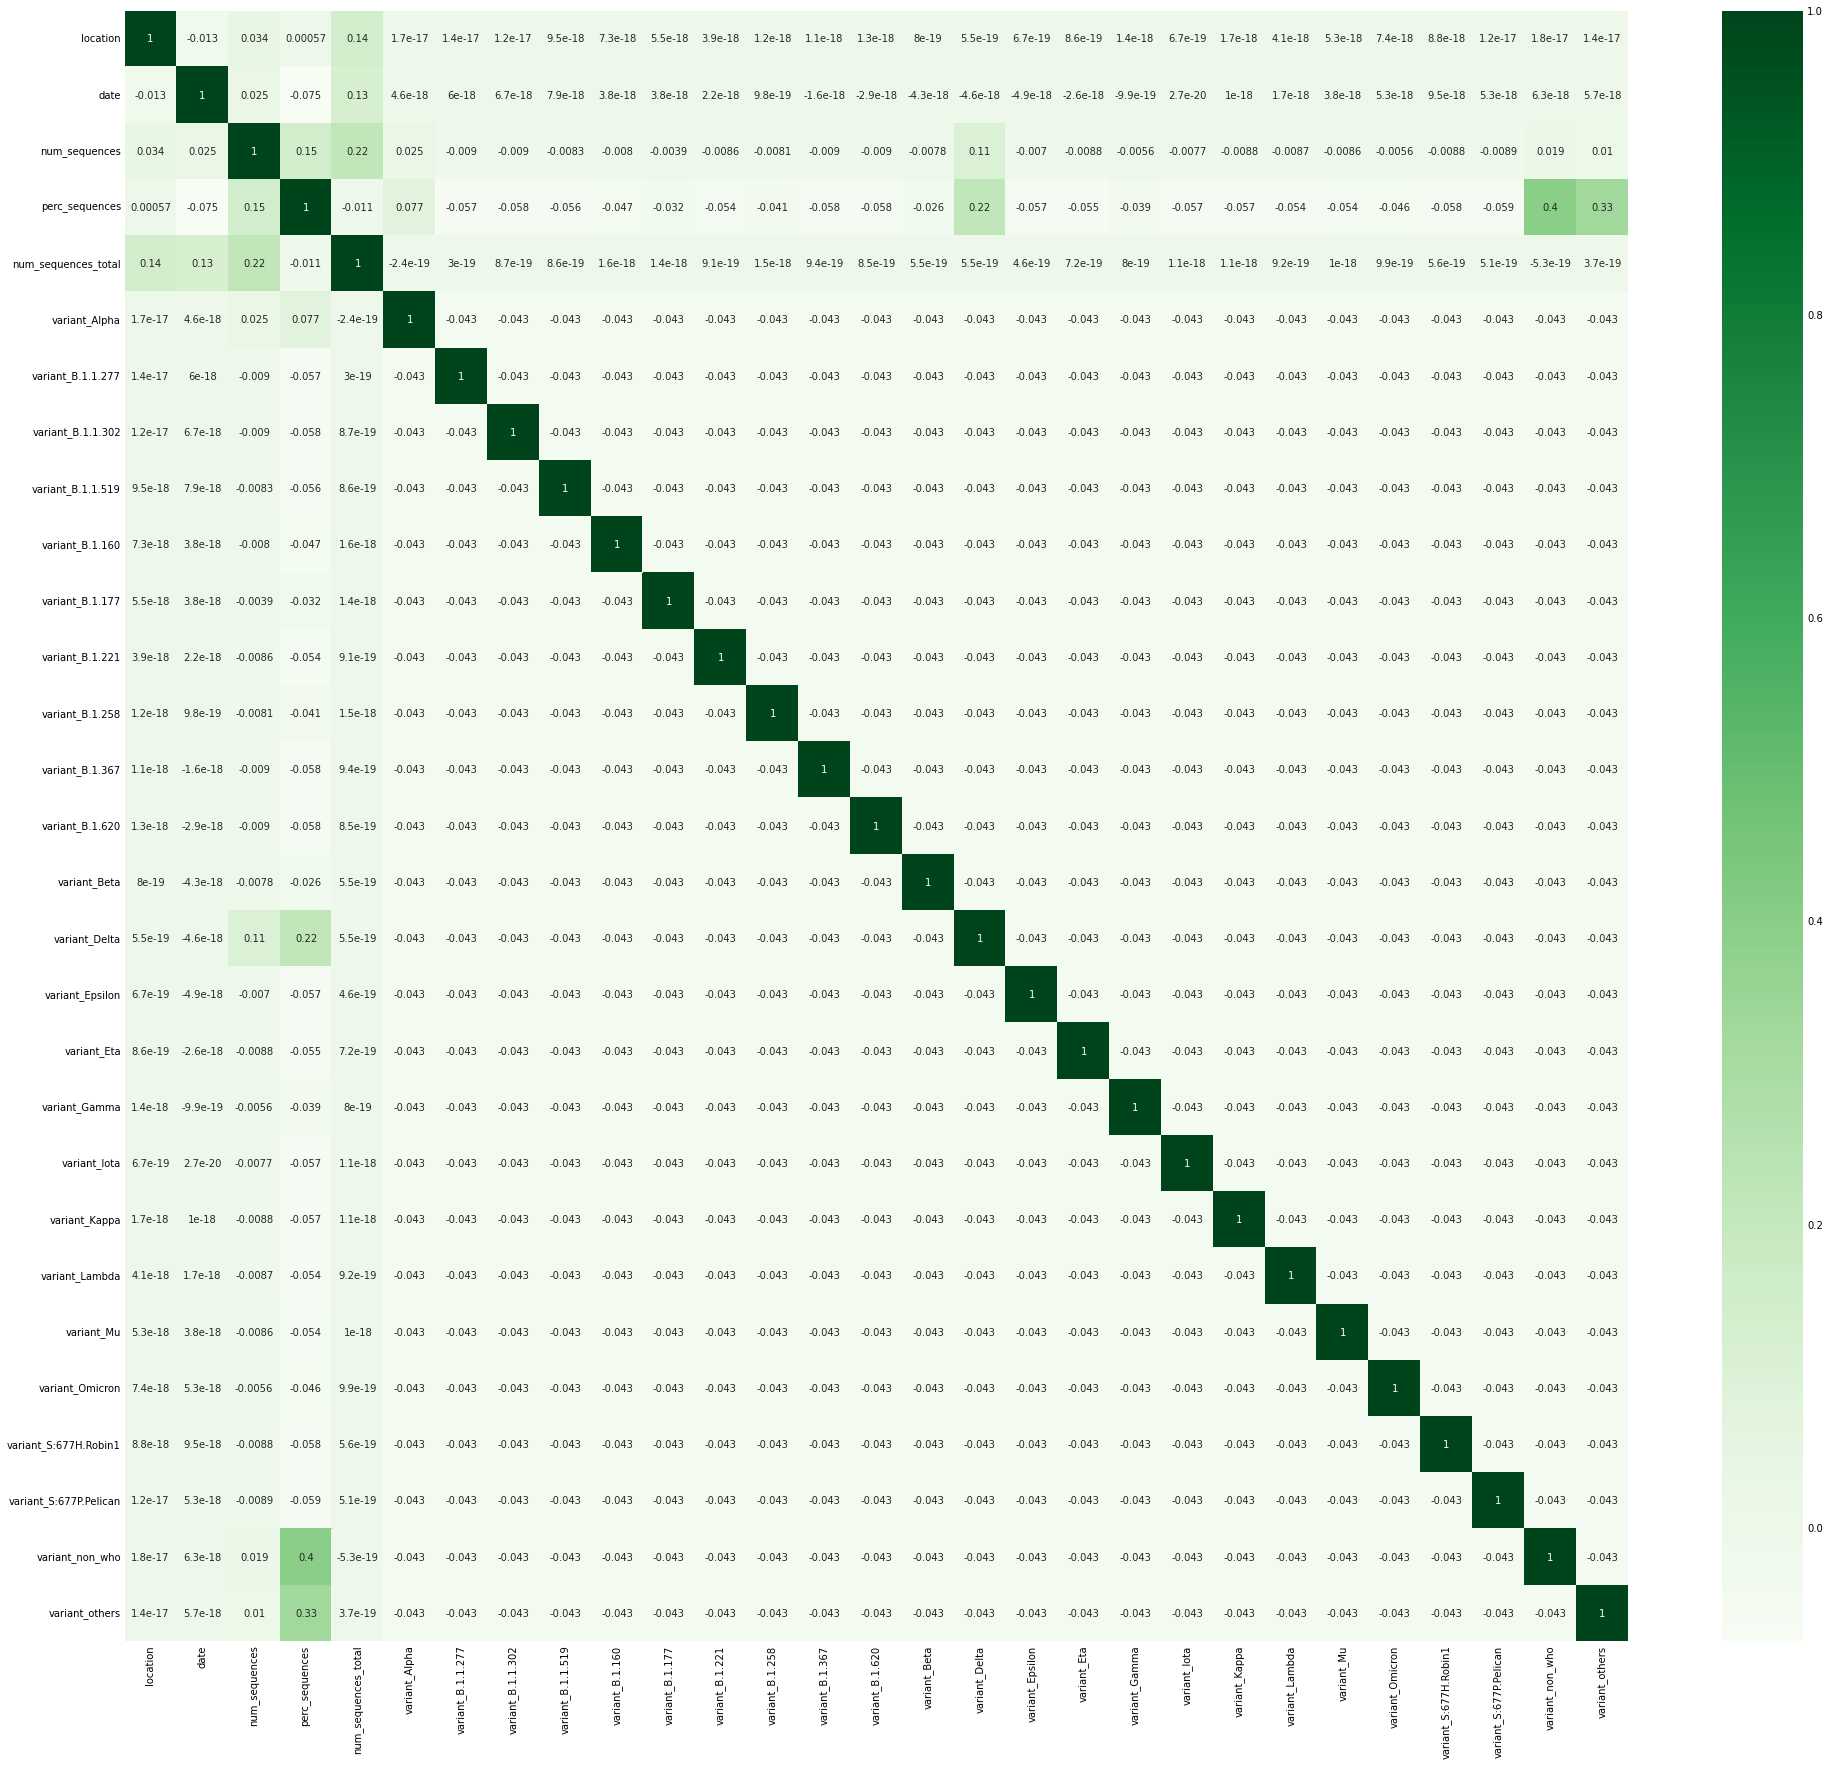

In [ ]:
plt.figure(figsize=(30,30))
sns.heatmap(covid.corr(), annot=True, cmap='Greens')